# Mozilla/Outreachy Datascience
## Device Failure
### Relationship between attributes needed
### Amani Abbas

The relationship between the attributes is poorly understood. A better understanding is needed in this regard for the data we are collecting.

* What is the correlation between the attributes?
* How do the scales differ or are similar between attributes?

In [1]:
#loading packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
#loading data
df = pd.read_csv('device_failure.csv')

In [3]:
#exploring data
df.head()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [4]:
df.tail()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
124489,15306,Z1F0MA1S,18310224,0,0,0,10,353705,8,8,0,0
124490,15306,Z1F0Q8RT,172556680,96,107,4,11,332792,0,0,13,0
124491,15306,Z1F0QK05,19029120,4832,0,0,11,350410,0,0,0,0
124492,15306,Z1F0QL3N,226953408,0,0,0,12,358980,0,0,0,0
124493,15306,Z1F0QLC1,17572840,0,0,0,10,351431,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null int64
device        124494 non-null object
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
failure       124494 non-null int64
dtypes: int64(11), object(1)
memory usage: 11.4+ MB


In [6]:
df.iloc[:, 2:11].describe()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


### Trying to find correlation between attributes

In [7]:
correlation = df.iloc[:, 2:11].corr()
correlation

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
attribute1,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [8]:
df.corr()['attribute3'].sort_values(ascending=False)

attribute3    1.000000
attribute9    0.532366
attribute4    0.097452
attribute6    0.009027
attribute1    0.003702
failure      -0.000948
date         -0.001580
attribute8   -0.001884
attribute7   -0.001884
attribute2   -0.002617
attribute5   -0.006696
Name: attribute3, dtype: float64

In [9]:
df.corr()['attribute7'].sort_values(ascending=False)

attribute8    1.000000
attribute7    1.000000
attribute2    0.141367
failure       0.119055
attribute4    0.045631
date          0.021653
attribute9    0.006861
attribute1    0.000151
attribute3   -0.001884
attribute5   -0.009384
attribute6   -0.012207
Name: attribute7, dtype: float64

### Conclusions:

* There is a perfect uphill (positive) linear relationship between `'attribute7'` and `'attribute8'`.
* There is a moderate uphill (positive) relationship between `'attribute3'` and `'attribute9'`.

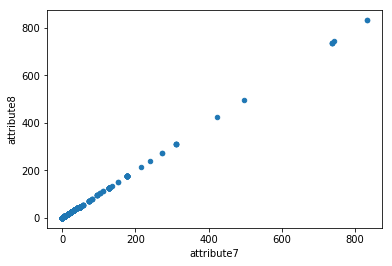

In [10]:
df.plot(x='attribute7', y='attribute8', kind= 'scatter');

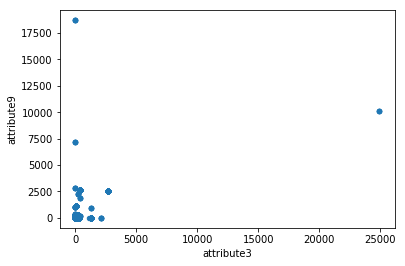

In [11]:
df.plot(x='attribute3', y='attribute9', kind= 'scatter');

In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Issue#1.ipynb'])

0